<a href="https://colab.research.google.com/github/tanmayb104/NLP-with-Disaster-Tweets/blob/main/NLP_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Read Dataset**

In [4]:
train = pd.read_csv('sample_data/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test = pd.read_csv('sample_data/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [6]:
train.duplicated().sum()

0

In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

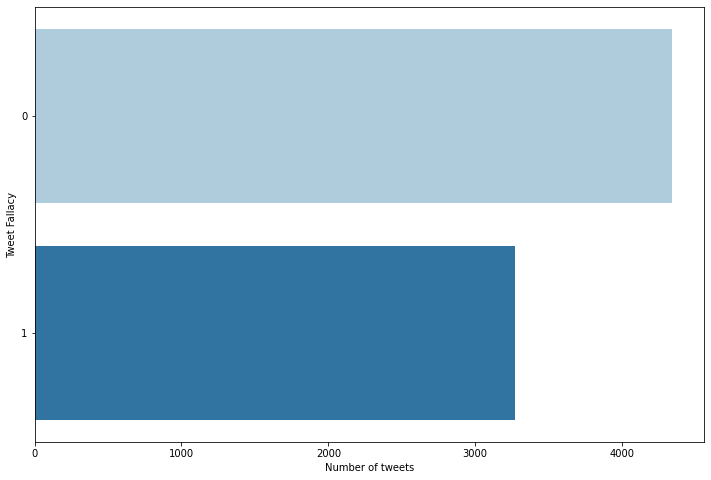

In [8]:
#Visualizing class distribution 
plt.figure(figsize=(12,8))
sns.countplot(y='target',data = train,palette="Paired")
plt.ylabel("Tweet Fallacy")
plt.xlabel("Number of tweets")
plt.show()

**Clean the dataset**

In [9]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

In [10]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
  
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [11]:
corpus = []
for i in range(len(train)):
    text = train['text'][i]
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_punct(text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [wordnet.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [12]:
corpus1 = []
for i in range(len(test)):
    text1 = test['text'][i]
    text1 = remove_URL(text)
    text1 = remove_html(text)
    text1 = remove_emoji(text)
    text1 = remove_punct(text)
    text1 = re.sub('[^a-zA-Z]', ' ', text1)
    text1 = text1.lower()
    text1 = text1.split()
    text1 = [wordnet.lemmatize(word) for word in text1 if word not in set(stopwords.words('english'))]
    text1 = ' '.join(text1)
    corpus1.append(text1)

**Bag Of Words**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500,ngram_range=(4,4))
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(train['target'])
y = y.iloc[:, 1].values

cv = CountVectorizer(max_features=2500,ngram_range=(4,4))
test_x = cv.fit_transform(corpus1).toarray()

**Tf-Idf**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=2500)
X1 = cv.fit_transform(corpus).toarray()

y1 = pd.get_dummies(train['target'])
y1 = y1.iloc[:, 1].values

cv = TfidfVectorizer(max_features=2500)
test_x1 = cv.fit_transform(corpus1).toarray()

**Confusion matrix and accuracy**

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def calculate(y_test,y_pred):
  confusion_m = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  print(confusion_m)
  print(accuracy)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X1, y1)

y_pred = spam_detect_model.predict(test_x1)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticR = LogisticRegression()
logisticR.fit(X1, y1)

y_pred = logisticR.predict(test_x1)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X1, y1)

y_pred = rfc.predict(test_x1)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

**Make submission file**

In [28]:
def convert(y_pred,name):
  data={"id":test["id"].tolist(),"target":y_pred}
  df = pd.DataFrame(data)
  df.to_csv(f"{name}.csv",index=False)

**Word Embeddings**

In [14]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Bidirectional, SpatialDropout1D
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import LSTM

In [15]:
a=set()
for i in corpus:
  for j in i.split():
    a.add(j)
for i in corpus1:
  for j in i.split():
    a.add(j)
print(len(a))


15385


In [16]:
vocab_size = 50000
encoded_docs = [one_hot(d, vocab_size) for d in corpus]
encoded_docs[:10]

[[44411, 15856, 14789, 32824, 47655, 7679, 33145],
 [34349, 35286, 25579, 30143, 33943, 39510, 47830],
 [40121, 23868, 21233, 43869, 570, 29362, 47857, 21233, 43869, 22083, 39385],
 [44062, 36260, 49589, 47857, 22083, 4475],
 [6633, 34188, 30187, 48818, 9316, 5491, 49589, 36342, 46385],
 [44371,
  35788,
  4475,
  44374,
  18185,
  39644,
  45448,
  40277,
  7584,
  35286,
  27505,
  49589],
 [44059,
  27435,
  40965,
  26349,
  15011,
  46159,
  11882,
  43401,
  38348,
  31800,
  13594,
  28857],
 [44012, 11911, 39458, 6128, 35286, 36774],
 [7853, 2895, 47857, 6432, 32285, 47278, 43401],
 [44012, 27791, 17048, 30121, 28857]]

In [17]:
encoded_docs1 = [one_hot(d, vocab_size) for d in corpus1]
encoded_docs1[:10]

[[11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036],
 [11868, 19812, 32447, 6936, 4475, 49589, 21224, 40036]]

In [18]:
# pad documents to a max length
max_length = 0
for i in encoded_docs:
  max_length = max(max_length,len(i))
for i in encoded_docs1:
  max_length = max(max_length,len(i))
print(max_length)

23


In [19]:
max_length = 30
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='pre')
print(padded_docs)

[[    0     0     0 ... 47655  7679 33145]
 [    0     0     0 ... 33943 39510 47830]
 [    0     0     0 ... 43869 22083 39385]
 ...
 [    0     0     0 ... 35255 11139  3051]
 [    0     0     0 ...  7024 28887 42154]
 [    0     0     0 ... 49589 21224 40036]]


In [20]:
padded_docs1 = pad_sequences(encoded_docs1, maxlen=max_length, padding='pre')
print(padded_docs1)

[[    0     0     0 ... 49589 21224 40036]
 [    0     0     0 ... 49589 21224 40036]
 [    0     0     0 ... 49589 21224 40036]
 ...
 [    0     0     0 ... 49589 21224 40036]
 [    0     0     0 ... 49589 21224 40036]
 [    0     0     0 ... 49589 21224 40036]]


In [28]:
# define the model
embedding_vector_features = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=max_length))
# model.add(Flatten())
# model.add(Dropout(0.1))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(1000, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 30, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 1000)              4404000   
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 9,405,001
Trainable params: 9,405,001
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.2)

In [30]:
# fit the model
# model.fit(padded_docs, y, epochs=2, verbose=1)

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
191/191 [==============================] - 581s 3s/step - loss: 0.5957 - accuracy: 0.6837 - val_loss: 0.4990 - val_accuracy: 0.7656
Epoch 2/5
191/191 [==============================] - 575s 3s/step - loss: 0.3670 - accuracy: 0.8488 - val_loss: 0.4527 - val_accuracy: 0.7879
Epoch 3/5
191/191 [==============================] - 570s 3s/step - loss: 0.2288 - accuracy: 0.9136 - val_loss: 0.5087 - val_accuracy: 0.7912
Epoch 4/5
191/191 [==============================] - 569s 3s/step - loss: 0.1449 - accuracy: 0.9478 - val_loss: 0.5923 - val_accuracy: 0.7663
Epoch 5/5
191/191 [==============================] - 577s 3s/step - loss: 0.0987 - accuracy: 0.9640 - val_loss: 0.6693 - val_accuracy: 0.7630


In [31]:
import numpy
y_pred=model.predict(X_test)
final_y_pred=[]
for i in range(len(y_pred)):
  final_y_pred.append(int(numpy.round(y_pred[i])))
final_y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,final_y_pred)


array([[698, 173],
       [188, 464]])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_y_pred)

0.762967826657912

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       871
           1       0.73      0.71      0.72       652

    accuracy                           0.76      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.76      0.76      0.76      1523



In [35]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 93.550503


In [36]:
ans = model.predict(padded_docs1)
ans

array([[0.9994863],
       [0.9994863],
       [0.9994863],
       ...,
       [0.9994863],
       [0.9994863],
       [0.9994863]], dtype=float32)

In [37]:
print(min(ans),max(ans))

[0.9994863] [0.9994863]


In [38]:
import numpy
final=[]
for i in range(len(ans)):
  final.append(int(numpy.round(ans[i])))
final[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [62]:
convert(final,"sub26")